In [ ]:
from google.colab import files
#uploaded = files.upload()
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread,imshow
import math
from scipy.signal import convolve2d
from skimage.io import imread,imsave,imshow

In [ ]:
im3=imread('cameraman.png')
im2=cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
new_img=cv2.resize(im2,None, fx = 1/4, fy = 1/4, interpolation = cv2.INTER_NEAREST)

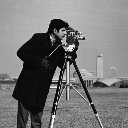

(128, 128)


In [ ]:
im2=cv2.resize(im2,(495,495))#so as to compare for PSNR
# new_img = cv2.cvtColor(img_25, cv2.COLOR_BGR2GRAY) # Converting to grayscale
cv2_imshow(new_img)
print(new_img.shape)

In [ ]:
#Nearest Neighbour
def nn(img, scale):
  h,w=img.shape
  new_h=int(h*scale)# this height is used to create a new image, where scale is the scaling factor
  new_w=int(w*scale)# this width is used to create a new image, where scale is the scaling factor
  new_img=np.zeros((new_h, new_w), dtype=np.uint8)

  for i in range(new_h):
    for j in range(new_w):
      x=int(i/scale)
      y=int(j/scale)

      new_img[i,j]=img[x,y]#assigning the value of the nearest neighbour to the new image

  return new_img

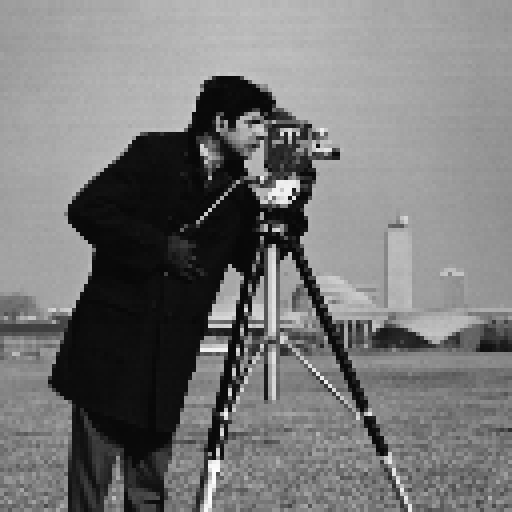

In [ ]:
out0=nn(new_img, 4)
cv2_imshow(out0)
out0=cv2.resize(out0,(495,495))

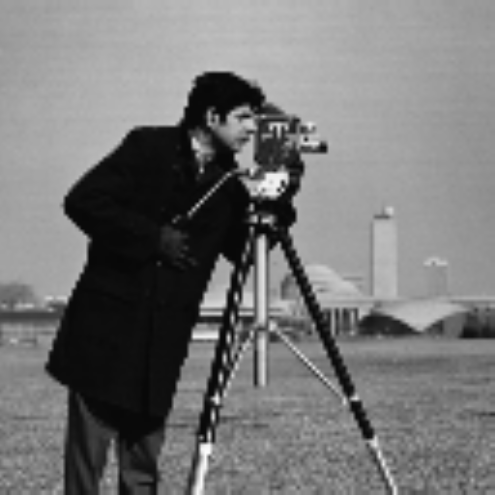

In [ ]:

def get_coordinates(width_out, height_out, i, j, width_in, height_in):# this function is used to get the coordinates of the input image
    x_out = j / width_out#this is the x coordinate of the output image
    y_out = i / height_out

    x_in = x_out * width_in
    y_in = y_out * height_in

    x_prev = int(np.floor(x_in))
    x_next = x_prev + 1
    y_prev = int(np.floor(y_in))
    y_next = y_prev + 1

    x_prev = min(x_prev, width_in - 1)
    x_next = min(x_next, width_in - 1)
    y_prev = min(y_prev, height_in - 1)
    y_next = min(y_next, height_in - 1)

    return x_in, y_in, x_prev, x_next, y_prev, y_next

def interpolate(array_in, x_prev, x_next, Dx_next, Dx_prev, y_prev, y_next, Dy_prev, Dy_next):# this function is used to interpolate the values of the pixels
    return Dy_prev * (array_in[y_next][x_prev] * Dx_next + array_in[y_next][x_next] * Dx_prev) \
            + Dy_next * (array_in[y_prev][x_prev] * Dx_next + array_in[y_prev][x_next] * Dx_prev)

def bilinear(array_in, width_in, height_in, array_out, width_out, height_out):# this function is used to perform bilinear interpolation
    for i in range(height_out):
        for j in range(width_out):
            x_in, y_in, x_prev, x_next, y_prev, y_next = get_coordinates(width_out, height_out, i, j, width_in, height_in)
            Dx_next = x_next - x_in
            Dx_prev = 1. - Dx_next
            Dy_next = y_next - y_in
            Dy_prev = 1. - Dy_next
            array_out[i][j] = interpolate(array_in, x_prev, x_next, Dx_next, Dx_prev, y_prev, y_next, Dy_prev, Dy_next)
    return array_out

out = np.zeros((495,495 ))
l_out1 = bilinear(new_img, new_img.shape[0], new_img.shape[1], out, 495, 495)
cv2_imshow(l_out1)

In [ ]:
#5x5 median filter for Q1:
'''def median_5(noised_img):
  # reading the input image
  input_img=noised_img

  # getting number of rows and cols of the input image
  row, col=input_img.shape

  # generating the output image
  output_img4=np.zeros([row, col])

  for i in range(2, row-2):
    for j in range(2, col-2):
      arr=[input_img[i-2, j-2],input_img[i-2, j-1],input_img[i-2, j],input_img[i-2, j+1],input_img[i-2, j+2],input_img[i-1, j-2],input_img[i-1, j-1],input_img[i-1, j],input_img[i-1, j+1],input_img[i-1, j+2],input_img[i, j-2],input_img[i, j-1],input_img[i, j],input_img[i, j+1],input_img[i, j+2],input_img[i+1, j-2],input_img[i+1, j-1],input_img[i+1, j],input_img[i+1, j+1],input_img[i+1, j+2],input_img[i+2, j-2],input_img[i+2, j-1],input_img[i+2, j],input_img[i+2, j+1],input_img[i+2, j+2]]
      arr=sorted(arr)
      output_img4[i,j]=arr[25//2]
  return output_img4'''

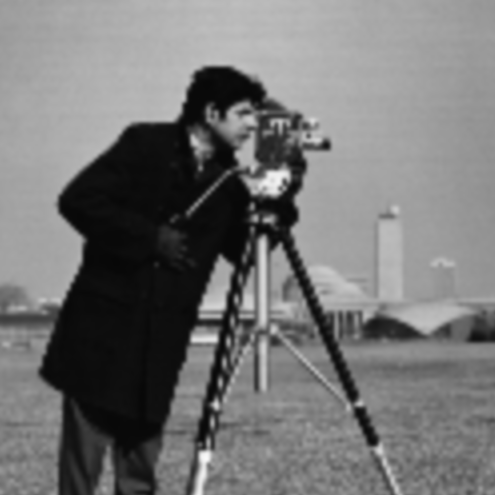

'def bell(x):\n    if abs(x) < 0.5:\n        return 0.75 - (abs(x))**2\n    if 0.5 <= abs(x) < 1.5:\n        return 0.5 * (abs(x) - 1.5)**2\n    return 0\n\ndef calculate_nearby_values(x, y):\n    # Calculate nearby values\n    x1 = 1 + x - math.floor(x)\n    x2 = x - math.floor(x)\n    x3 = math.floor(x) + 1 - x\n    x4 = math.floor(x) + 2 - x\n\n    y1 = 1 + y - math.floor(y)\n    y2 = y - math.floor(y)\n    y3 = math.floor(y) + 1 - y\n    y4 = math.floor(y) + 2 - y\n\n    return x1, x2, x3, x4, y1, y2, y3, y4\n\ndef create_interpolation_matrices(new_img, x, x1, x2, x3, x4, y,y1, y2, y3, y4):\n    # Create interpolation matrices\n    mat_l = np.matrix([[bell(x1), bell(x2), bell(x3), bell(x4)]])\n    mat_m = np.matrix([[new_img[int(y-y1), int(x-x1)],\n                        new_img[int(y-y2), int(x-x1)],\n                        new_img[int(y+y3), int(x-x1)],\n                        new_img[int(y+y4), int(x-x1)]],\n                       [new_img[int(y-y1), int(x-x2)],\n            

In [ ]:
def bell(x):
    if abs(x) < 0.5:
        return 0.75 - (abs(x))**2
    if 0.5 <= abs(x) < 1.5:
        return 0.5 * (abs(x) - 1.5)**2
    return 0

def calculate_nearby_values(x, y):
    # Calculate nearby values
    x1 = 1 + x - math.floor(x)
    x2 = x - math.floor(x)
    x3 = math.floor(x) + 1 - x
    x4 = math.floor(x) + 2 - x

    y1 = 1 + y - math.floor(y)
    y2 = y - math.floor(y)
    y3 = math.floor(y) + 1 - y
    y4 = math.floor(y) + 2 - y

    return x1, x2, x3, x4, y1, y2, y3, y4

def create_interpolation_matrices(new_img, x, x1, x2, x3, x4, y,y1, y2, y3, y4):
    # Create interpolation matrices
    mat_l = np.matrix([[bell(x1), bell(x2), bell(x3), bell(x4)]])
    mat_m = np.matrix([[new_img[int(y-y1), int(x-x1)],
                        new_img[int(y-y2), int(x-x1)],
                        new_img[int(y+y3), int(x-x1)],
                        new_img[int(y+y4), int(x-x1)]],
                       [new_img[int(y-y1), int(x-x2)],
                        new_img[int(y-y2), int(x-x2)],
                        new_img[int(y+y3), int(x-x2)],
                        new_img[int(y+y4), int(x-x2)]],
                       [new_img[int(y-y1), int(x+x3)],
                        new_img[int(y-y2), int(x+x3)],
                        new_img[int(y+y3), int(x+x3)],
                        new_img[int(y+y4), int(x+x3)]],
                       [new_img[int(y-y1), int(x+x4)],
                        new_img[int(y-y2), int(x+x4)],
                        new_img[int(y+y3), int(x+x4)],
                        new_img[int(y+y4), int(x+x4)]]])
    mat_r = np.matrix([[bell(y1)], [bell(y2)], [bell(y3)], [bell(y4)]])

    return mat_l, mat_m, mat_r

def apply_bilinear_interpolation(new_img, l_out2):
    m, n = new_img.shape
    for j in range(m * 4 - 17):
        for i in range(n * 4 - 17):
            h = 1/4
            x, y = i * h + 2, j * h + 2

            x1, x2, x3, x4, y1, y2, y3, y4 = calculate_nearby_values(x, y)
            mat_l, mat_m, mat_r = create_interpolation_matrices(new_img, x,x1, x2, x3, x4, y,y1, y2, y3, y4)

            # Calculate the bilinear interpolation
            l_out2[j, i] = np.dot(np.dot(mat_l, mat_m), mat_r)

    return l_out2

m,n=new_img.shape
l_out2=np.zeros((m*4-17,n*4-17))
apply_bilinear_interpolation(new_img,l_out2)
cv2_imshow(l_out2)

In [ ]:
#3x3 Median Filter for Q1:
'''def median(im):
  m,n=im.shape
  out = np.zeros([m, n])
  for i in range(1, m-1):
    for j in range(1, n-1):
      arr=[]
      for var1 in range(-1,2):
        for var2 in range(-1,2):
          arr.append(im[i+var1,j+var2])
          arr = sorted(arr)
      out[i, j]= arr[4]
  return out'''

'''def median_3(noised_img):
  # getting number of rows and cols of the input image
  row, col=noised_img.shape

  # generating the output image
  output_img3=np.zeros([row, col])

  for i in range(1, row-1):
    for j in range(1, col-1):
      arr=[noised_img[i-1, j-1],noised_img[i-1, j],noised_img[i-1, j+1],noised_img[i, j-1],noised_img[i, j],noised_img[i, j+1],noised_img[i+1, j-1],noised_img[i+1, j],noised_img[i+1, j+1]]
      arr=sorted(arr)
      output_img3[i,j]=arr[9//2]
  return output_img3'''

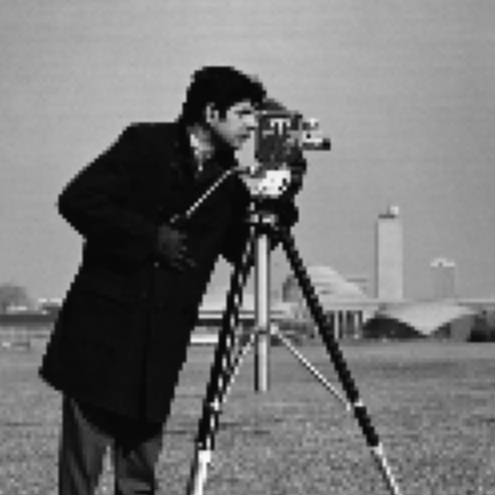

'def hermite(x):\n  if abs(x)<=1:\n    return 2*abs(x)**3 - 3*abs(x)**2 +1\n  return 0\n\ndef calculate_nearby_values(x,y):\n    x1 = 1 + x - math.floor(x)\n    x2 = x - math.floor(x)\n    x3 = math.floor(x) + 1 - x\n    x4 = math.floor(x) + 2 - x\n\n    y1 = 1 + y - math.floor(y)\n    y2 = y - math.floor(y)\n    y3 = math.floor(y) + 1 - y\n    y4 = math.floor(y) + 2 - y\n\n    return x1, x2, x3, x4, y1, y2, y3, y4\n\ndef create_matrix_l(x1, x2, x3, x4):\n    return np.matrix([hermite(x1), hermite(x2), hermite(x3), hermite(x4)])\n\ndef create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4):\n    return np.matrix([[new_img[int(y-y1), int(x-x1)],\n                      new_img[int(y-y2), int(x-x1)],\n                      new_img[int(y+y3), int(x-x1)],\n                      new_img[int(y+y4), int(x-x1)]],\n                     [new_img[int(y-y1), int(x-x2)],\n                      new_img[int(y-y2), int(x-x2)],\n                      new_img[int(y+y3), int(x-x2)],\n                  

In [ ]:
def hermite(x):
  if abs(x)<=1:
    return 2*abs(x)**3 - 3*abs(x)**2 +1
  return 0

def calculate_nearby_values(x,y):
    x1 = 1 + x - math.floor(x)
    x2 = x - math.floor(x)
    x3 = math.floor(x) + 1 - x
    x4 = math.floor(x) + 2 - x

    y1 = 1 + y - math.floor(y)
    y2 = y - math.floor(y)
    y3 = math.floor(y) + 1 - y
    y4 = math.floor(y) + 2 - y

    return x1, x2, x3, x4, y1, y2, y3, y4

def create_matrix_l(x1, x2, x3, x4):
    return np.matrix([hermite(x1), hermite(x2), hermite(x3), hermite(x4)])

def create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4):
    return np.matrix([[new_img[int(y-y1), int(x-x1)],
                      new_img[int(y-y2), int(x-x1)],
                      new_img[int(y+y3), int(x-x1)],
                      new_img[int(y+y4), int(x-x1)]],
                     [new_img[int(y-y1), int(x-x2)],
                      new_img[int(y-y2), int(x-x2)],
                      new_img[int(y+y3), int(x-x2)],
                      new_img[int(y+y4), int(x-x2)]],
                     [new_img[int(y-y1), int(x+x3)],
                      new_img[int(y-y2), int(x+x3)],
                      new_img[int(y+y3), int(x+x3)],
                      new_img[int(y+y4), int(x+x3)]],
                     [new_img[int(y-y1), int(x+x4)],
                      new_img[int(y-y2), int(x+x4)],
                      new_img[int(y+y3), int(x+x4)],
                      new_img[int(y+y4), int(x+x4)]]])

def create_matrix_r(y1, y2, y3, y4):
    return np.matrix([[hermite(y1)], [hermite(y2)], [hermite(y3)], [hermite(y4)]])

def apply_hermite_interpolation(new_img, l_out3):
  m, n = new_img.shape
  for j in range(m * 4 - 17):
    for i in range(n * 4 - 17):
      h=1/4
      x, y = i * h + 2, j * h + 2
      x1, x2, x3, x4, y1, y2, y3, y4 = calculate_nearby_values(x,y)
      mat_l = create_matrix_l(x1, x2, x3, x4)
      mat_m = create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4)
      mat_r = create_matrix_r(y1, y2, y3, y4)

      # Calculate the Hermite interpolation
      l_out3[j, i] = np.dot(np.dot(mat_l, mat_m), mat_r)


# print(l_out)
m,n=new_img.shape
l_out3=np.zeros((m*4-17,n*4-17))
apply_hermite_interpolation(new_img,l_out3)
cv2_imshow(l_out3)

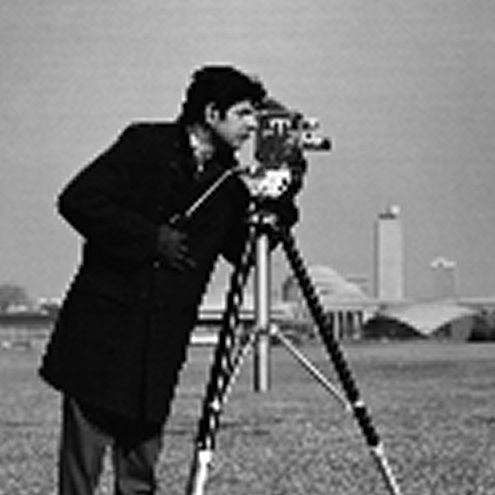

'def bicubic(a,x):\n  if abs(x)<=1:\n    return (a+2)*(abs(x))**3 - (a+3)*(abs(x))**2 +1\n  if 2>x>1:\n    return a*(abs(x))**3 - 5*a*(abs(x))**2 + 8*a*(abs(x)) - 4*a\n  return 0\n\na = -1\n\ndef calculate_nearby_values(x,y):\n    x1 = 1 + x - math.floor(x)\n    x2 = x - math.floor(x)\n    x3 = math.floor(x) + 1 - x\n    x4 = math.floor(x) + 2 - x\n\n    y1 = 1 + y - math.floor(y)\n    y2 = y - math.floor(y)\n    y3 = math.floor(y) + 1 - y\n    y4 = math.floor(y) + 2 - y\n\n    return x1, x2, x3, x4, y1, y2, y3, y4\n\ndef create_matrix_l(x1, x2, x3, x4, a):\n    return np.matrix([[bicubic(a, x1), bicubic(a, x2), bicubic(a, x3), bicubic(a, x4)]])\n\ndef create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4):\n    return np.matrix([[new_img[int(y - y1), int(x - x1)],\n                      new_img[int(y - y2), int(x - x1)],\n                      new_img[int(y + y3), int(x - x1)],\n                      new_img[int(y + y4), int(x - x1)]],\n                     [new_img[int(y - y1), in

In [ ]:
def bicubic(a,x):
  if abs(x)<=1:
    return (a+2)*(abs(x))**3 - (a+3)*(abs(x))**2 +1
  if 2>x>1:
    return a*(abs(x))**3 - 5*a*(abs(x))**2 + 8*a*(abs(x)) - 4*a
  return 0

a = -1

def calculate_nearby_values(x,y):
    x1 = 1 + x - math.floor(x)
    x2 = x - math.floor(x)
    x3 = math.floor(x) + 1 - x
    x4 = math.floor(x) + 2 - x

    y1 = 1 + y - math.floor(y)
    y2 = y - math.floor(y)
    y3 = math.floor(y) + 1 - y
    y4 = math.floor(y) + 2 - y

    return x1, x2, x3, x4, y1, y2, y3, y4

def create_matrix_l(x1, x2, x3, x4, a):
    return np.matrix([[bicubic(a, x1), bicubic(a, x2), bicubic(a, x3), bicubic(a, x4)]])

def create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4):
    return np.matrix([[new_img[int(y - y1), int(x - x1)],
                      new_img[int(y - y2), int(x - x1)],
                      new_img[int(y + y3), int(x - x1)],
                      new_img[int(y + y4), int(x - x1)]],
                     [new_img[int(y - y1), int(x - x2)],
                      new_img[int(y - y2), int(x - x2)],
                      new_img[int(y + y3), int(x - x2)],
                      new_img[int(y + y4), int(x - x2)]],
                     [new_img[int(y - y1), int(x + x3)],
                      new_img[int(y - y2), int(x + x3)],
                      new_img[int(y + y3), int(x + x3)],
                      new_img[int(y + y4), int(x + x3)]],
                     [new_img[int(y - y1), int(x + x4)],
                      new_img[int(y - y2), int(x + x4)],
                      new_img[int(y + y3), int(x + x4)],
                      new_img[int(y + y4), int(x + x4)]]])

def create_matrix_r(y1, y2, y3, y4, a):
    return np.matrix([[bicubic(a, y1)], [bicubic(a, y2)], [bicubic(a, y3)], [bicubic(a, y4)]])

def apply_bicubic_interpolation(new_img, l_out4):
  m,n=new_img.shape
  for j in range(m * 4 - 17):
    for i in range(n * 4 - 17):
      h=1/4
      x, y = i * h + 2, j * h + 2
      x1, x2, x3, x4, y1, y2, y3, y4 = calculate_nearby_values(x,y)
      mat_l = create_matrix_l(x1, x2, x3, x4, a)
      mat_m = create_matrix_m(new_img, x, x1, x2, x3, x4,y,y1,y2,y3,y4)
      mat_r = create_matrix_r(y1, y2, y3, y4, a)

      # Calculate the Bicubic interpolation
      l_out4[j, i] = np.dot(np.dot(mat_l, mat_m), mat_r)


# print(l_out)
m,n=new_img.shape
l_out4=np.zeros((m*4-17,n*4-17))
apply_bicubic_interpolation(new_img,l_out4)
cv2_imshow(l_out4)
l_out4 = cv2.resize(new_img,dsize=(495, 495),  interpolation=cv2.INTER_CUBIC)

In [ ]:
# PSNR
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
print(PSNR(im2,out0))
print(PSNR(im2,l_out1))
print(PSNR(im2,l_out2))
print(PSNR(im2,l_out3))
print(PSNR(im2,l_out4))

32.49076427109166
25.087212669691255
19.87524701427126
19.226351829251726
32.189385288809255
